Using item ID: ssp=1-26\slr_ens0.0\2020.tif


c:\Users\fuentesm\AppData\Local\miniforge3\envs\solara-dashboard\Lib\site-packages\pystac_client\collection_client.py:201: FallbackToPystac: Falling back to pystac. This might be slow.
  root._warn_about_fallback("FEATURES", "ITEM_SEARCH")
c:\Users\fuentesm\AppData\Local\miniforge3\envs\solara-dashboard\Lib\site-packages\pystac_client\collection_client.py:153: FallbackToPystac: Falling back to pystac. This might be slow.
  root._warn_about_fallback("ITEM_SEARCH")


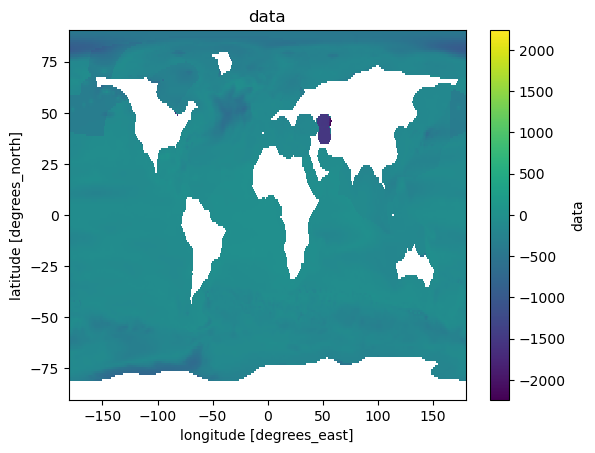

In [47]:
import odc.stac
from pystac_client import Client
import matplotlib.pyplot as plt
import pandas as pd

# Open catalog
catalog = Client.open(
    "https://storage.googleapis.com/coclico-data-public/coclico/coclico-stac/catalog.json"
)

# Get collection
slp6_col = catalog.get_child("slp6")
slp6_col
parquet_asset = slp6_col.get_assets()["geoparquet-stac-items"]

# Load the parquet file into memory
parquet_df = pd.read_parquet(parquet_asset.href)    

# Define filter parameters
year = 2020
ssp_scenario = "1-26"
slr_ensemble = "0.0"

# Filter parquet data with all conditions at once
filtered_df = parquet_df[
    (parquet_df["datetime"].dt.year == year) &
    (parquet_df["ssp"] == ssp_scenario) &
    (parquet_df["slr_ens"] == slr_ensemble)
]

# Get the ID from the first filtered result
item_id = filtered_df.iloc[0]['id']
print(f"Using item ID: {item_id}")

# Get the specific item by ID
ssp6_item = slp6_col.get_item(item_id)

# Load as xarray dataset
ds = odc.stac.load([ssp6_item])

# Plot the first band
ds_band = list(ds.data_vars)[0]  
ds[ds_band].plot(cmap="viridis")  
plt.title(ds_band)
plt.show()

In [51]:
# Open catalog
catalog = Client.open(
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-sotc/catalog.json"
)
list(catalog.get_children())
# sub_col = catalog.get_child("Haz-Land_Sub_2040_COGs")


[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Exp_world_pop_parquet>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>,
 <CollectionClient id=Exp-Delta_DEM_COGs>,
 <CollectionClient id=Haz-ERA5_93-23>,
 <CollectionClient id=Vul_World_Protected_Areas>,
 <CollectionClient id=Haz-MRI-ESM2-0_Hind_93-14>,
 <CollectionClient id=Haz-MPI-ESM1-2-LR_Hind_93-14>,
 <CollectionClient id=Haz-KIOST-ESM_Hind_93-14>,
 <CollectionClient id=Haz-IPSL-CM